<a href="https://colab.research.google.com/github/Ganeshwalimbe/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/Ganesh_Walimbe_Capstone_project_ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [140]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
#importing dataset
data=pd.read_csv('/content/drive/MyDrive/AlmaBetter /Capstone projects /Ganesh Walimbe -capstone project -Company classification/ Zomato Restaurant names and Metadata.csv')

In [143]:
#printing first 5 rows
data.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gachibowli,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gachibowli,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-hotel-restaurant-gachibowli,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Beverages",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon-brew-company-gachibowli,"1,200","Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest","Asian, Continental, North Indian, Chinese, Mediterranean","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)"


In [144]:
#printing last 5 rows
data.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gachibowli,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-gachibowli,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fri-Sun)"
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-counts-3-gachibowli,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1-gachibowli,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-noodles-lemon-tree-hotel-gachibowli,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [146]:
data['Cost'] = data['Cost'].str.replace(",","").astype('int64')

In [147]:
data.shape

(105, 6)

In [148]:
data.isnull().sum()

Name           0 
Links          0 
Cost           0 
Collections    54
Cuisines       0 
Timings        1 
dtype: int64

In [149]:
data=data.drop(['Links','Collections'],axis=1)

In [150]:
data.shape

(105, 4)

In [151]:
data=data.dropna()

In [152]:
cuisine_list=data.Cuisines.str.split(', ')
cuisine={}
for i in cuisine_list:
    for j in i:
        if (j in cuisine):
            cuisine[j]+=1
        else:
            cuisine[j]=1

In [153]:
cuisine

{'Chinese': 43,
 'Continental': 21,
 'Kebab': 6,
 'European': 4,
 'South Indian': 8,
 'North Indian': 60,
 'Biryani': 16,
 'Asian': 15,
 'Mediterranean': 5,
 'Desserts': 13,
 'Seafood': 4,
 'Beverages': 5,
 'Goan': 1,
 'Healthy Food': 1,
 'Lebanese': 1,
 'American': 6,
 'Ice Cream': 2,
 'Street Food': 2,
 'Fast Food': 15,
 'BBQ': 2,
 'Italian': 14,
 'Finger Food': 2,
 'Burger': 5,
 'Japanese': 2,
 'Salad': 5,
 'Sushi': 4,
 'Mexican': 1,
 'Mughlai': 6,
 'Bakery': 7,
 'Juices': 1,
 'Arabian': 2,
 'Andhra': 5,
 'Hyderabadi': 4,
 'Cafe': 6,
 'Spanish': 1,
 'Wraps': 1,
 'Thai': 3,
 'Indonesian': 1,
 'Modern Indian': 2,
 'Momos': 4,
 'Pizza': 1,
 'North Eastern': 1,
 'Mithai': 1,
 'Malaysian': 1}

# **Most prefered cuisines in restaurants**

In [154]:
cuisine_df=pd.DataFrame(list(cuisine.items()),columns=['cuisine_name','Counts_of_Restaurants'])
cuisine_df=cuisine_df.sort_values(by='Counts_of_Restaurants',ascending=False).head(10)
cuisine_df

,cuisine_name,Counts_of_Restaurants
5,North Indian,60
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,8
28,Bakery,7


In [155]:
cuisine_name=cuisine_df['cuisine_name']
counts_of_Restaurants=cuisine_df['Counts_of_Restaurants']

[Text(0.5, 1.0, 'Most prefered cuisines in restaurants')]

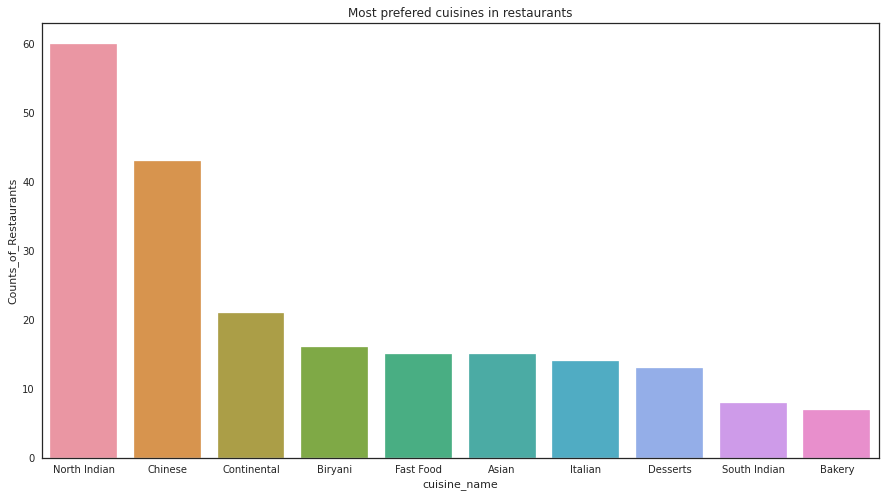

In [156]:
#plotting barplot of cuisines  v/s  counts_of_Restaurant
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=cuisine_df,x=cuisine_name,y=counts_of_Restaurants, ax=ax)
ax.set(title='Most prefered cuisines in restaurants')

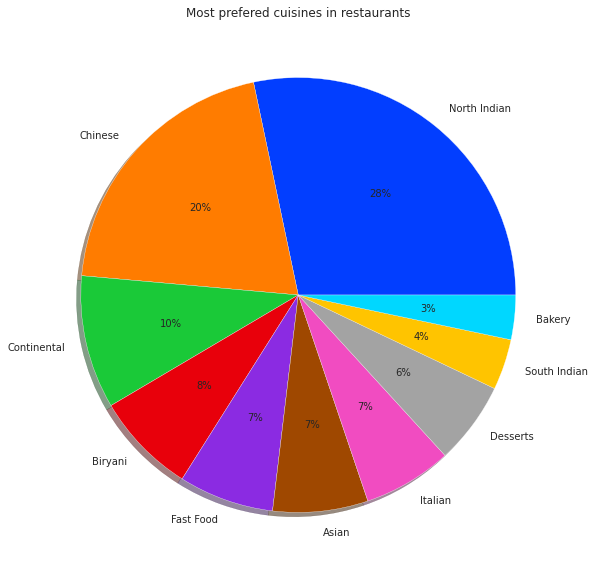

In [157]:
#plotting Bookings per market segment pie chart
plt.figure(figsize=(10,10))
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
# plotting data on chart
plt.pie(counts_of_Restaurants, labels=cuisine_name, colors=palette_color, autopct='%.0f%%',shadow=True)
plt.title("Most prefered cuisines in restaurants")

plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

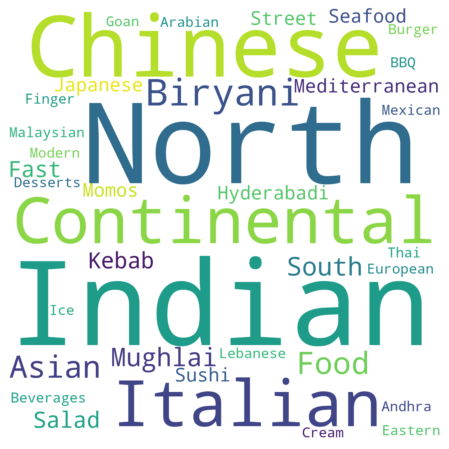

In [158]:
#Creating word cloud for Cuisines
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,8))
text = " ".join(name for name in data.sort_values('Cuisines',ascending=False).Cuisines[:50])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

**From above barplot and word cloud we can say that the most preferred cuisines in restaurants is North Indian, Chinese food, continental ,Biryani and fast food etc**

# **Highest spending by people in restaurants**

In [159]:
cost_restaurant=data.groupby(['Name','Cuisines'])['Cost'].sum().reset_index()
high_spending=cost_restaurant.sort_values(by='Cost',ascending=False).head(10)
high_spending

,Name,Cuisines,Cost
23,Collage - Hyatt Hyderabad Gachibowli,"Continental, Italian, North Indian, Chinese, Asian",2800
35,Feast - Sheraton Hyderabad Hotel,"Modern Indian, Asian, Continental, Italian",2500
0,10 Downing Street,"North Indian, Chinese, Continental",1900
48,Jonathan's Kitchen - Holiday Inn Express & Suites,"North Indian, Japanese, Italian, Salad, Sushi",1900
20,Cascade - Radisson Hyderabad Hitec City,"North Indian, Italian, Continental, Asian",1800
101,Zega - Sheraton Hyderabad Hotel,"Asian, Sushi",1750
73,Republic Of Noodles - Lemon Tree Hotel,"Thai, Asian, Chinese, Malaysian",1700
60,Mazzo - Marriott Executive Apartments,"Italian, North Indian, South Indian, Asian",1700
14,Barbeque Nation,"Mediterranean, North Indian, Kebab, BBQ",1600
9,Arena Eleven,Continental,1600


In [160]:
#defining columns for plotting barplot
cost=high_spending['Cost']
Restaurant_name=high_spending['Name']

[Text(0.5, 1.0, 'Highest spending by people in restaurants')]

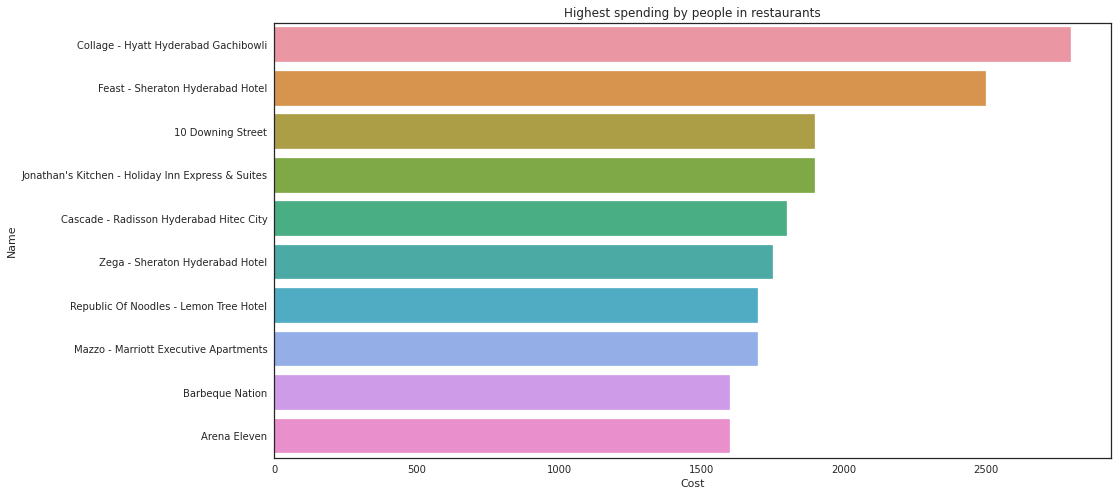

In [161]:
#plotting barplot to find top agents 
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=high_spending,x=cost,y=Restaurant_name, ax=ax)
ax.set(title='Highest spending by people in restaurants')

**From barplot we can see that ,

 Customers spending is highest at  restaurants named :

1.Collage-Hyatt Hyderabad Ghachibowli

2.Feast Sheraton Hyderabad hotel 

3.10 Downing street 

4.Jonathan’s kitchen-Holiday inn express and suites

5.Cascade –Radisson Hyderabad Hitec city 

Customers must have gone to these  restaurants for lunch ,dinner or for to  party**

# **Lowest spending by people in restaurants**

In [162]:
cost_restaurant=data.groupby(['Name','Cuisines'])['Cost'].sum().reset_index()
low_spending=cost_restaurant.sort_values(by='Cost',ascending=True).head(10)
low_spending

,Name,Cuisines,Cost
7,Amul,"Ice Cream, Desserts",150
61,Mohammedia Shawarma,"Street Food, Arabian",150
43,Hunger Maggi Point,Fast Food,200
50,KS Bakers,"Bakery, Desserts, Fast Food",200
82,Sweet Basket,"Bakery, Mithai",200
11,Asian Meal Box,Asian,200
62,Momos Delight,Momos,200
99,Wich Please,Fast Food,250
78,Shah Ghouse Spl Shawarma,Lebanese,300
24,Cream Stone,"Ice Cream, Desserts",350


[Text(0.5, 1.0, 'lowest spending by people in restaurants')]

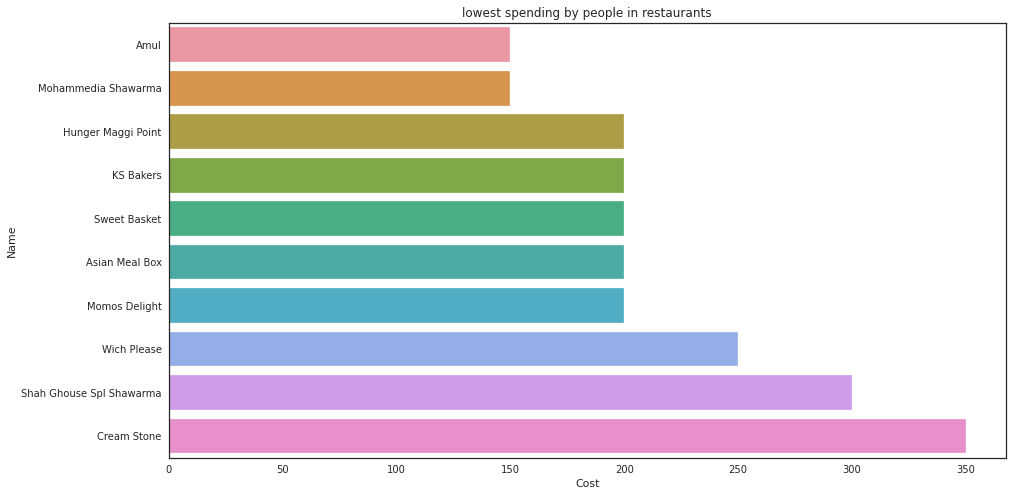

In [163]:
#plotting barplot to find top agents 
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=low_spending,x=low_spending['Cost'],y=low_spending['Name'], ax=ax)
ax.set(title='lowest spending by people in restaurants')

From barplot we can see that, 
Customers spending is highest at  restaurants named : 
1.Amul  

2.Mohammedia shawarma 

3.Hunger maggi point  

4.Ks bakers  

5.Sweet baskets  

Customers must have gone to  these restaurants to eat breakfast, fast foods ,ice creams and to drink  cold drinks..

# **Clustering**

In [164]:
df=data.copy()
df.head()


,Name,Cost,Cuisines,Timings
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Beverages",12 Noon to 2 AM
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Mediterranean","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)"


In [165]:
df=df.drop(['Timings'],axis=1)

In [166]:
df.shape

(104, 3)

In [167]:
df['Cuisines'] = df['Cuisines'].str.replace(' ','')
df['Cuisines'] = df['Cuisines'].str.split(',')

In [168]:
df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"[Chinese, Continental, Kebab, European, SouthIndian, NorthIndian]"
1,Paradise,800,"[Biryani, NorthIndian, Chinese]"
2,Flechazo,1300,"[Asian, Mediterranean, NorthIndian, Desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[Biryani, NorthIndian, Chinese, Seafood, Beverages]"
4,Over The Moon Brew Company,1200,"[Asian, Continental, NorthIndian, Chinese, Mediterranean]"


In [169]:
df.shape

(104, 3)

In [170]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

In [171]:
df=df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(df.pop('Cuisines')),index=df.index, columns=mlb.classes_))

In [172]:
df.shape

(104, 46)

In [173]:
df.head()

,Name,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,1300,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [174]:
x=df.drop('Name',axis=1)

In [175]:
df.shape

(104, 46)

In [176]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [177]:
df.shape

(104, 46)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse co

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6c6aca390>,
                 estimator=KMeans(n_clusters=9), k=(2, 10), locate_elbow=False,
                 timings=False)

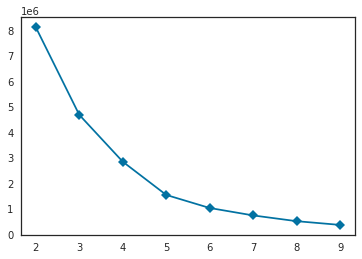

In [178]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='distortion', timings=False, locate_elbow=False
)

visualizer.fit(x)        # Fit the data to the visualizer

In [179]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [180]:
y_kmeans.shape

(104,)

In [181]:
df.shape

(104, 46)

In [182]:
df['km_labels'] = y_kmeans

Text(0.5, 1.0, 'visualizing clusters using k means clustering')

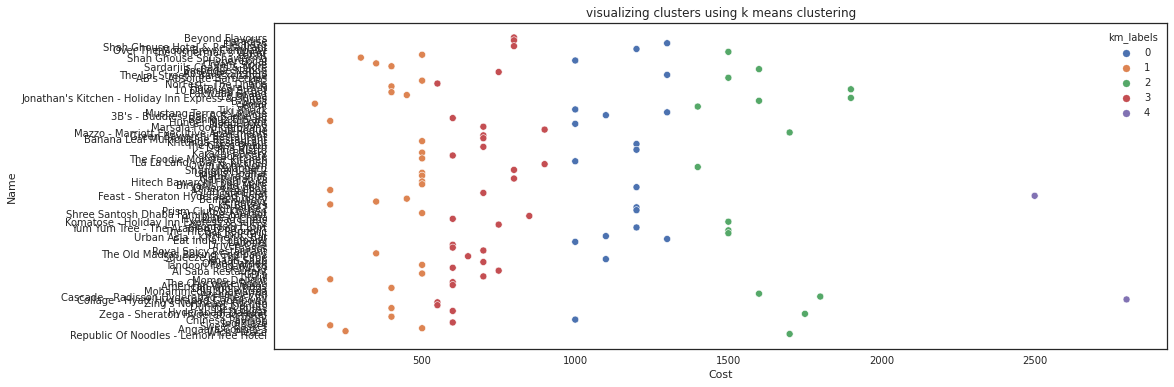

In [183]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(x='Cost',y='Name',data=df,hue='km_labels', palette = 'deep')
plt.title('visualizing clusters using k means clustering')

In [184]:
kmeans.cluster_centers_

array([[ 1.14500000e+03,  5.00000000e-02, -2.08166817e-17,
         6.93889390e-18,  2.00000000e-01,  6.93889390e-18,
         1.00000000e-01,  5.00000000e-02,  5.55111512e-17,
        -2.08166817e-17, -6.93889390e-18,  4.50000000e-01,
         3.50000000e-01,  1.00000000e-01,  1.00000000e-01,
         2.77555756e-17,  1.00000000e-01,  3.46944695e-18,
         3.46944695e-18,  5.00000000e-02,  6.93889390e-18,
         3.46944695e-18,  3.50000000e-01,  6.93889390e-18,
         5.00000000e-02,  1.50000000e-01,  3.46944695e-18,
         3.46944695e-18,  1.50000000e-01,  5.00000000e-02,
         3.46944695e-18,  6.93889390e-18,  5.00000000e-02,
         1.50000000e-01,  3.46944695e-18,  7.00000000e-01,
         3.46944695e-18,  5.00000000e-02,  5.00000000e-02,
         5.00000000e-02,  5.00000000e-02,  6.93889390e-18,
         5.00000000e-02,  5.00000000e-02,  3.46944695e-18],
       [ 3.84848485e+02,  6.06060606e-02,  3.03030303e-02,
         3.03030303e-02,  3.03030303e-02, -3.46944695e-

In [185]:
cluster_1 = df[df['km_labels'] == 0].reset_index()
cluster_2 = df[df['km_labels'] == 1].reset_index()
cluster_3 = df[df['km_labels'] == 2].reset_index()
cluster_4 = df[df['km_labels'] == 3].reset_index()
cluster_5 = df[df['km_labels'] == 4].reset_index()

In [186]:
clusters_list=[cluster_1,cluster_2,cluster_3,cluster_4,cluster_5]

In [187]:
df2=df.copy()

In [188]:
df.shape

(104, 47)

In [189]:
df1=df.drop(['Name'],axis=1)

In [190]:
df1.shape

(104, 46)

In [191]:
df.shape

(104, 47)

In [192]:
# Top cuisines in each cluster according to k means
for i,df1 in enumerate(clusters_list):
  print(f'Top cuisines in cluster {i+1}\n', df1.drop(['index','Cost','Name','km_labels'],axis=1).sum().sort_values(ascending=False)[:5],'\n')

Top cuisines in cluster 1
 NorthIndian    14
Chinese        9 
Italian        7 
Continental    7 
Asian          4 
dtype: int64 

Top cuisines in cluster 2
 NorthIndian    16
Chinese        10
FastFood       8 
Desserts       6 
Biryani        5 
dtype: int64 

Top cuisines in cluster 3
 NorthIndian    11
Asian          6 
Continental    6 
Chinese        5 
Italian        4 
dtype: int64 

Top cuisines in cluster 4
 NorthIndian    18
Chinese        18
Biryani        11
FastFood       7 
Cafe           6 
dtype: int64 

Top cuisines in cluster 5
 Asian           2
Italian         2
Continental     2
ModernIndian    1
Chinese         1
dtype: int64 



In [193]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [194]:
# Calculate Silhoutte Score
score = silhouette_score(x, kmeans.labels_, metric='euclidean')
print('Silhouette Score of k means: %.3f' % score)

Silhouette Score of k means: 0.559


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6d19e6b90>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=5))

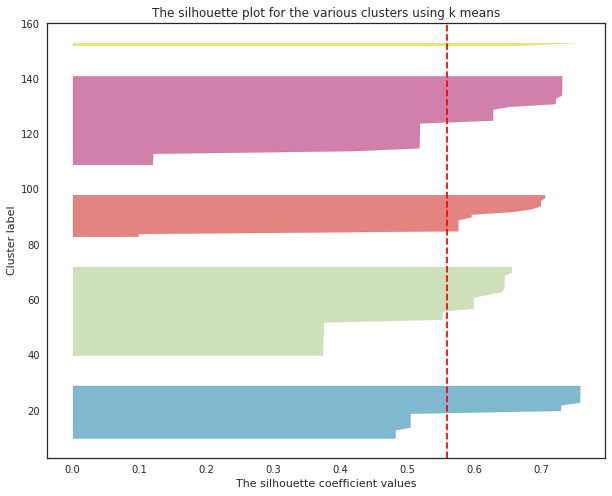

In [195]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(figsize = (10,8))
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick',ax=ax)
ax.set_title("The silhouette plot for the various clusters using k means")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")
visualizer.fit(x)

In [196]:
x1=df2.drop('Name',axis=1)


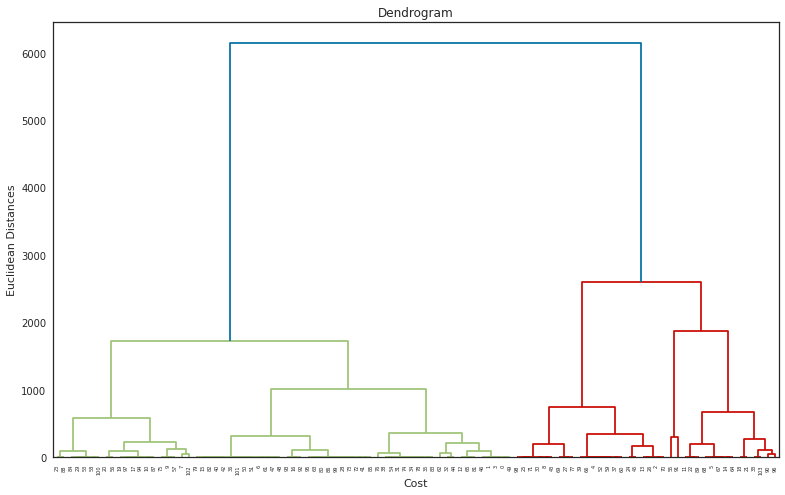

In [197]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(x1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Cost')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

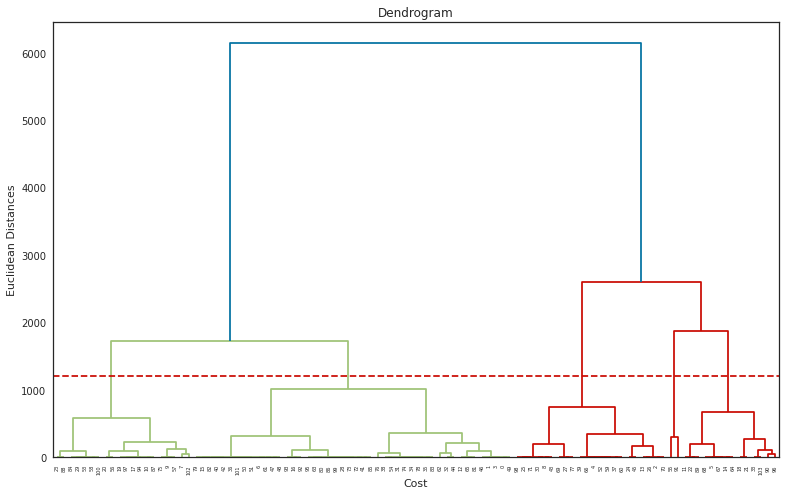

In [198]:
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(x1, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Cost')
plt.ylabel('Euclidean Distances')
plt.axhline(y=1200, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.**

**No. of Cluster = 5**

In [199]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [200]:
y_hc.shape

(104,)

In [201]:
df2.shape

(104, 47)

In [202]:
df2['hc_labels']=y_hc

Text(0.5, 1.0, 'visualizing clusters of Hierarchical clustering')

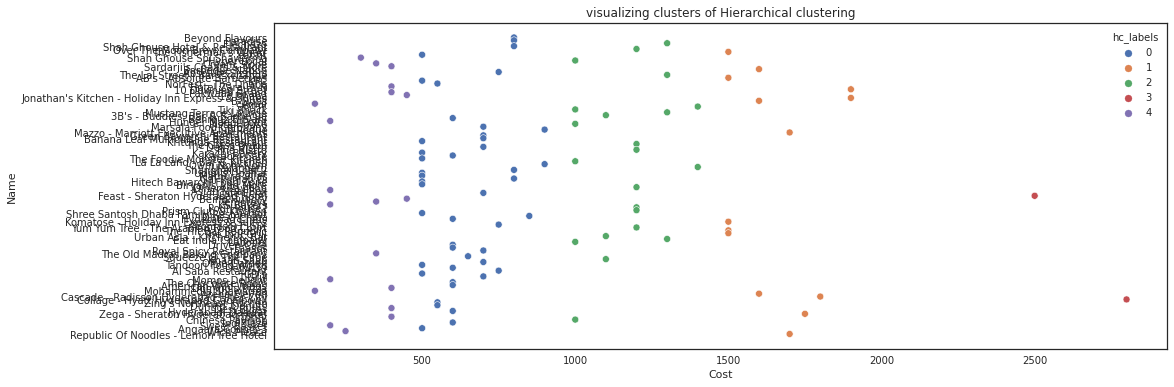

In [204]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(x='Cost',y='Name',data=df2,hue='hc_labels', palette = 'deep')
plt.title('visualizing clusters of Hierarchical clustering')

In [65]:
cluster_1 = df2[df2['hc_labels'] == 0].reset_index()
cluster_2 = df2[df2['hc_labels'] == 1].reset_index()
cluster_3 = df2[df2['hc_labels'] == 2].reset_index()
cluster_4 = df2[df2['hc_labels'] == 3].reset_index()
cluster_5 = df2[df2['hc_labels'] == 4].reset_index()

In [66]:
clusters_list1=[cluster_1,cluster_2,cluster_3,cluster_4,cluster_5]

In [67]:
# Top cuisines in each cluster for Hierarchical clustering
for i,df2 in enumerate(clusters_list1):
  print(f'Top cuisines in cluster {i+1}\n', df2.drop(['index','Name','Cost','km_labels','hc_labels'],axis=1).sum().sort_values(ascending=False)[:5],'\n')

Top cuisines in cluster 1
 NorthIndian    27
Chinese        24
Biryani        15
FastFood       10
Desserts        7
dtype: int64 

Top cuisines in cluster 2
 NorthIndian    9
Asian          6
Continental    5
Italian        4
Sushi          3
dtype: int64 

Top cuisines in cluster 3
 NorthIndian    16
Chinese        11
Continental     8
Italian         7
Asian           4
dtype: int64 

Top cuisines in cluster 4
 Asian           2
Italian         2
Continental     2
ModernIndian    1
Chinese         1
dtype: int64 

Top cuisines in cluster 5
 NorthIndian    7
FastFood       5
Desserts       4
Chinese        4
Bakery         3
dtype: int64 



In [68]:
# Calculate Silhoutte Score
score = silhouette_score(x1, hc.labels_, metric='euclidean')
print('Silhouetter Score of hierachial clustering: %.3f' % score)

Silhouetter Score of hierachial clustering: 0.553


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


# **SENTIMENTAL ANALYSIS**

In [69]:
data1=pd.read_csv('/content/drive/MyDrive/AlmaBetter /Capstone projects /Ganesh Walimbe -capstone project -Company classification/Zomato Restaurant reviews.csv')

In [70]:
data1.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [71]:
data1.shape

(10000, 7)

In [72]:
data1.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [73]:
data1=data1.dropna()

In [74]:
df_sentiment = data.merge(data1, left_on='Name',right_on='Restaurant')

In [75]:
df_sentiment.isnull().sum()

Name          0
Cost          0
Cuisines      0
Timings       0
Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [76]:
df_sentiment.head()

,Name,Cost,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [77]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9855 entries, 0 to 9854
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9855 non-null   object
 1   Cost        9855 non-null   int64 
 2   Cuisines    9855 non-null   object
 3   Timings     9855 non-null   object
 4   Restaurant  9855 non-null   object
 5   Reviewer    9855 non-null   object
 6   Review      9855 non-null   object
 7   Rating      9855 non-null   object
 8   Metadata    9855 non-null   object
 9   Time        9855 non-null   object
 10  Pictures    9855 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 923.9+ KB


In [78]:
df_sentiment.Rating.value_counts()

5       3805
4       2340
1       1718
3       1172
2        675
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [79]:
df_sentiment.loc[df_sentiment['Rating'] == 'Like'] = np.nan
df_sentiment['Rating']= df_sentiment['Rating'].astype('float64')

In [80]:
df_sentiment.Metadata.value_counts()

1 Review                        906
1 Review , 1 Follower           746
2 Reviews , 1 Follower          335
2 Reviews                       260
1 Review , 2 Followers          226
                               ... 
11 Reviews , 331 Followers        1
22 Reviews , 79 Followers         1
120 Reviews , 220 Followers       1
11 Reviews , 26 Followers         1
472 Reviews , 1302 Followers      1
Name: Metadata, Length: 2465, dtype: int64

In [81]:
# split metadata column into 2 columns i.e. Reviews and followers
df_sentiment['Reviews'],df_sentiment['Followers']= df_sentiment['Metadata'].str.split(',').str
df_sentiment['Reviews'] = pd.to_numeric(df_sentiment['Reviews'].str.split(' ').str[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [82]:
df_sentiment = df_sentiment.drop(['Metadata'], axis =1)

In [83]:
df_sentiment['Followers']= pd.to_numeric(df_sentiment['Followers'].str.split(' ').str[1])

In [84]:
# Converting Time column into Time, Year, Month, Hour
df_sentiment['Time']=pd.to_datetime(df_sentiment['Time'])
df_sentiment['Year'] = pd.DatetimeIndex(df_sentiment['Time']).year
df_sentiment['Month'] = pd.DatetimeIndex(df_sentiment['Time']).month
df_sentiment['Hour'] = pd.DatetimeIndex(df_sentiment['Time']).hour

In [85]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9855 entries, 0 to 9854
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        9854 non-null   object        
 1   Cost        9854 non-null   float64       
 2   Cuisines    9854 non-null   object        
 3   Timings     9854 non-null   object        
 4   Restaurant  9854 non-null   object        
 5   Reviewer    9854 non-null   object        
 6   Review      9854 non-null   object        
 7   Rating      9854 non-null   float64       
 8   Time        9854 non-null   datetime64[ns]
 9   Pictures    9854 non-null   float64       
 10  Reviews     9854 non-null   float64       
 11  Followers   8296 non-null   float64       
 12  Year        9854 non-null   float64       
 13  Month       9854 non-null   float64       
 14  Hour        9854 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(6)
memory usage: 1.2+ MB


In [86]:
df_sentiment.isnull().sum()

Name             1
Cost             1
Cuisines         1
Timings          1
Restaurant       1
Reviewer         1
Review           1
Rating           1
Time             1
Pictures         1
Reviews          1
Followers     1559
Year             1
Month            1
Hour             1
dtype: int64

In [87]:
df_sentiment.duplicated().sum()

0

In [88]:
df_sentiment['Followers'].fillna(0,inplace=True)

In [89]:
# we can drop the remaining missing data
df_sentiment.dropna(inplace=True)

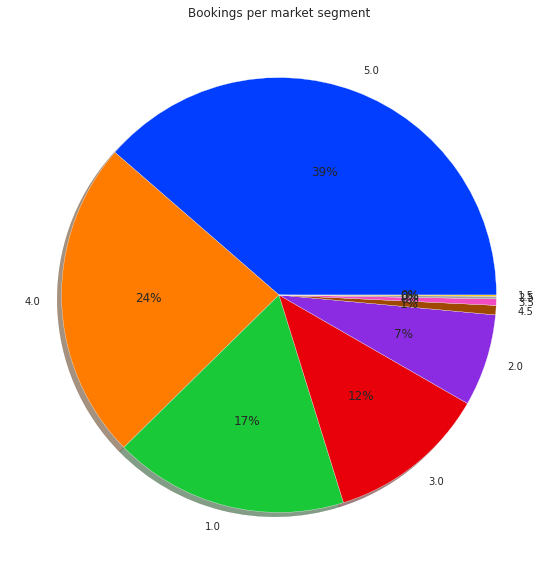

In [90]:
#plotting Bookings per market segment pie chart
rating=df_sentiment["Rating"].value_counts()
rating
plt.figure(figsize=(10,10))
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
# plotting data on chart
plt.pie(rating, labels=rating.index, colors=palette_color, autopct='%.0f%%',shadow=True)
plt.title("Bookings per market segment")

plt.show()

In [91]:
highest_rated_restuarnt=df_sentiment.groupby(['Restaurant']).apply(lambda x:np.average(x['Rating'])).reset_index(name='AverageRatings')
highest_rated_restuarnt=highest_rated_restuarnt.sort_values(by='AverageRatings',ascending=False).head(10)
highest_rated_restuarnt

,Restaurant,AverageRatings
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66
86,The Indi Grill,4.60
96,Zega - Sheraton Hyderabad Hotel,4.45
64,Over The Moon Brew Company,4.34
16,Beyond Flavours,4.28
19,Cascade - Radisson Hyderabad Hitec City,4.26


[Text(0.5, 1.0, 'Restuarants with highest average ratings')]

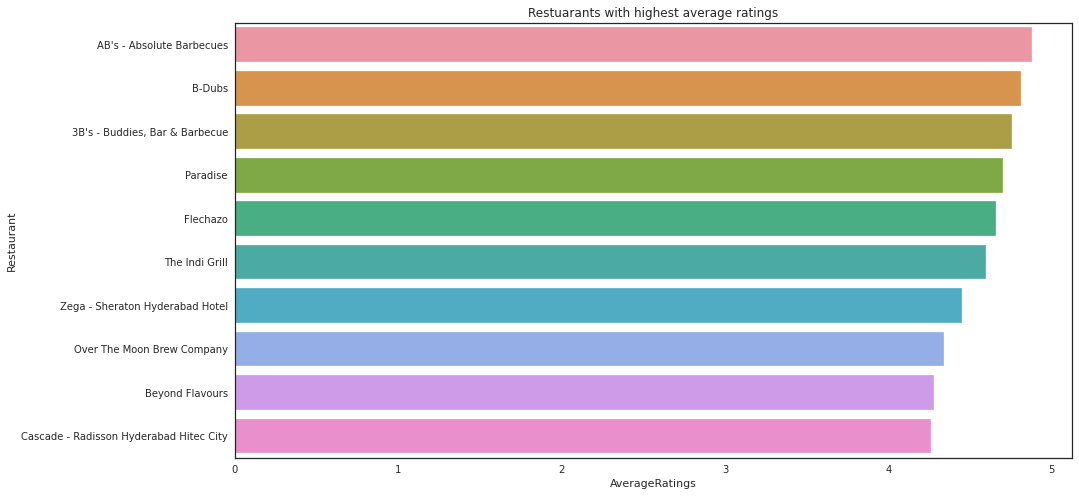

In [92]:
#plotting barplot to find top agents 
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=highest_rated_restuarnt,y=highest_rated_restuarnt['Restaurant'],x=highest_rated_restuarnt['AverageRatings'], ax=ax)
ax.set(title='Restuarants with highest average ratings')

In [93]:
max_reviews = df_sentiment.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
max_reviews= max_reviews.sort_values(by = 'Review_Count',ascending=False).head(10)  
max_reviews

,Reviewer,Review_Count
650,Ankita,13
3833,Parijat Ray,12
2636,Kiran,12
6964,Vedant Killa,11
2297,Jay Mehta,10
3113,Manojkumar D Nambisan,10
5918,Siva Kumar,10
264,Age Of Foodies (Suraj Karambe),10
3976,Prachita Jayaswal,9
7126,Vinay,9


[Text(0.5, 1.0, 'Maximum reviews given by customer ')]

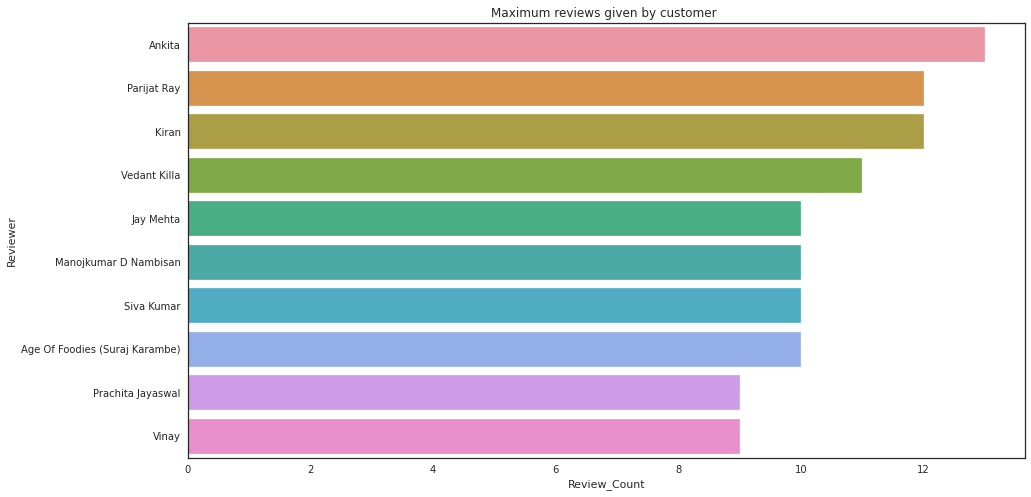

In [94]:
#plotting barplot to find top agents 
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=max_reviews,y=max_reviews['Reviewer'],x=max_reviews['Review_Count'], ax=ax)
ax.set(title='Maximum reviews given by customer ')

In [95]:
busiest_month=df_sentiment.groupby(['Month']).apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
busiest_month

,Month,Review_Count
0,1.0,629
1,2.0,693
2,3.0,1044
3,4.0,1235
4,5.0,1523
5,6.0,292
6,7.0,1326
7,8.0,675
8,9.0,645
9,10.0,629


[Text(0.5, 1.0, 'Busiest Months')]

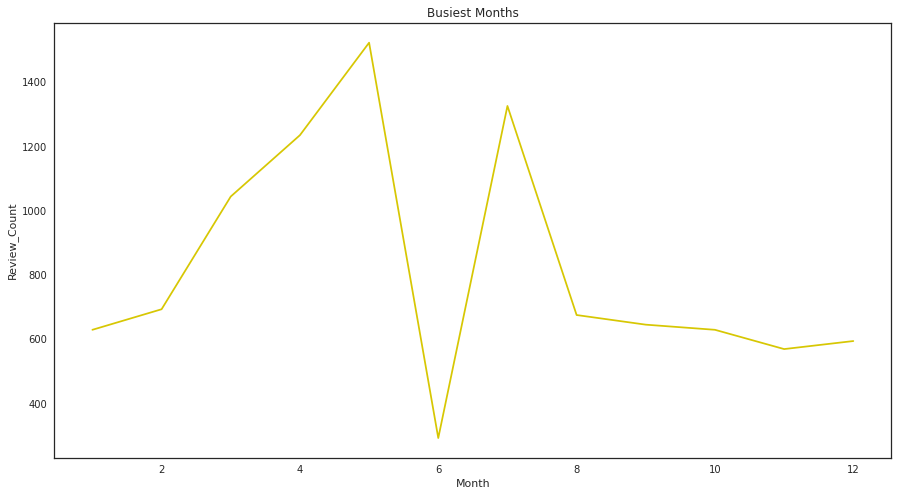

In [96]:
fig,ax=plt.subplots(figsize=(15,8))
sns.lineplot(data=busiest_month,x=busiest_month['Month'] ,y=busiest_month['Review_Count'],color='y' ,ax=ax)
ax.set(title='Busiest Months')

(-0.5, 1399.5, 1399.5, -0.5)

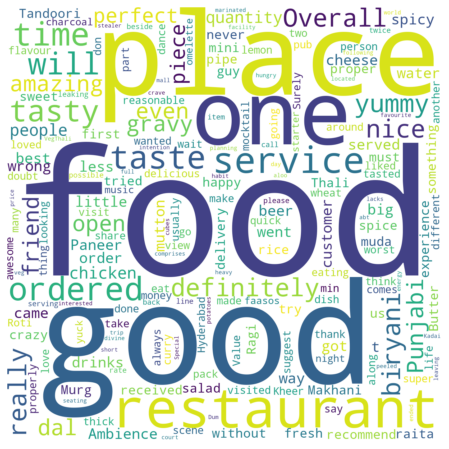

In [97]:
#Creating word cloud for reviews
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,8))
text = " ".join(name for name in df_sentiment.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

# **TEXT PREPROCESSING**

In [112]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [99]:
import string
from nltk.corpus import stopwords

In [100]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [101]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [102]:
df_sentiment['reviews'] = df_sentiment['Review'].apply(text_process)

In [103]:
df_sentiment=df_sentiment.drop(['Name','Cost','Cuisines','Timings','Reviewer','Time','Pictures','Followers','Year','Month','Hour','Reviews'],axis=1)
df_sentiment.head()

,Restaurant,Review,Rating,reviews
0,Beyond Flavours,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,ambience good food quite good Saturday lunch cost effective Good place sate brunch One also chill friends parents Waiter Soumen Das really courteous helpful
1,Beyond Flavours,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,Ambience good pleasant evening Service prompt Food good good experience Soumen Das kudos service
2,Beyond Flavours,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,must try great food great ambience Thnx service Pradeep Subroto personal recommendation Penne Alfredo Pasta Also music background amazing
3,Beyond Flavours,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,Soumen das Arun great guy behavior sincerety good food course would like visit place
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,Food goodwe ordered Kodi drumsticks basket mutton biryani good Thanks Pradeep served well enjoyed Ambience also good


In [104]:
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [105]:
df_sentiment['reviews']=remove_non_leters(df_sentiment['reviews'])

In [114]:
df_sentiment.head()

,Restaurant,Review,Rating,reviews,reviews_lemmatized
0,Beyond Flavours,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,ambience good food quite good Saturday lunch cost effective Good place sate brunch One also chill friends parents Waiter Soumen Das really courteous helpful,"[a, m, b, i, e, n, c, e, , g, o, o, d, , f, o, o, d, , q, u, i, t, e, , g, o, o, d, , S, a, t, u, r, d, a, y, , l, u, n, c, h, , c, o, s, t, , e, f, f, e, c, t, i, v, e, , G, o, o, d, , p, l, a, c, e, , s, a, t, e, , b, r, u, n, c, h, , O, n, e, , a, l, s, o, , c, h, i, l, l, , f, r, ...]"
1,Beyond Flavours,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,Ambience good pleasant evening Service prompt Food good good experience Soumen Das kudos service,"[A, m, b, i, e, n, c, e, , g, o, o, d, , p, l, e, a, s, a, n, t, , e, v, e, n, i, n, g, , S, e, r, v, i, c, e, , p, r, o, m, p, t, , F, o, o, d, , g, o, o, d, , g, o, o, d, , e, x, p, e, r, i, e, n, c, e, , S, o, u, m, e, n, , D, a, s, , k, u, d, o, s, , s, e, r, v, i, c, e]"
2,Beyond Flavours,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,must try great food great ambience Thnx service Pradeep Subroto personal recommendation Penne Alfredo Pasta Also music background amazing,"[m, u, s, t, , t, r, y, , g, r, e, a, t, , f, o, o, d, , g, r, e, a, t, , a, m, b, i, e, n, c, e, , T, h, n, x, , s, e, r, v, i, c, e, , P, r, a, d, e, e, p, , S, u, b, r, o, t, o, , p, e, r, s, o, n, a, l, , r, e, c, o, m, m, e, n, d, a, t, i, o, n, , P, e, n, n, e, , A, l, f, r, e, d, ...]"
3,Beyond Flavours,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,Soumen das Arun great guy behavior sincerety good food course would like visit place,"[S, o, u, m, e, n, , d, a, s, , A, r, u, n, , g, r, e, a, t, , g, u, y, , b, e, h, a, v, i, o, r, , s, i, n, c, e, r, e, t, y, , g, o, o, d, , f, o, o, d, , c, o, u, r, s, e, , w, o, u, l, d, , l, i, k, e, , v, i, s, i, t, , p, l, a, c, e]"
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,Food goodwe ordered Kodi drumsticks basket mutton biryani good Thanks Pradeep served well enjoyed Ambience also good,"[F, o, o, d, , g, o, o, d, w, e, , o, r, d, e, r, e, d, , K, o, d, i, , d, r, u, m, s, t, i, c, k, s, , b, a, s, k, e, t, , m, u, t, t, o, n, , b, i, r, y, a, n, i, , g, o, o, d, , T, h, a, n, k, s, , P, r, a, d, e, e, p, , s, e, r, v, e, d, , w, e, l, l, , e, n, j, o, y, e, d, , A, m, ...]"


In [115]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [116]:
#Create a function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

In [117]:
#Create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

In [120]:
#Create two new columns
df_sentiment['Subjectivity'] = df_sentiment['reviews'].apply(subjectivity)
df_sentiment['Polarity'] = df_sentiment['reviews'].apply(polarity)

In [121]:
#Create a function to compute the negative, neutral and positive output
def sentiment_output(polarity_score):
    if polarity_score <0:
        return 'Negative'
    elif polarity_score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [122]:
df_sentiment['sentiment_output'] = df_sentiment['Polarity'].apply(sentiment_output)

In [123]:
df_sentiment.head()

,Restaurant,Review,Rating,reviews,reviews_lemmatized,Subjectivity,Polarity,sentiment_output
0,Beyond Flavours,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,ambience good food quite good Saturday lunch cost effective Good place sate brunch One also chill friends parents Waiter Soumen Das really courteous helpful,"[a, m, b, i, e, n, c, e, , g, o, o, d, , f, o, o, d, , q, u, i, t, e, , g, o, o, d, , S, a, t, u, r, d, a, y, , l, u, n, c, h, , c, o, s, t, , e, f, f, e, c, t, i, v, e, , G, o, o, d, , p, l, a, c, e, , s, a, t, e, , b, r, u, n, c, h, , O, n, e, , a, l, s, o, , c, h, i, l, l, , f, r, ...]",0.720000,0.660000,Positive
1,Beyond Flavours,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,Ambience good pleasant evening Service prompt Food good good experience Soumen Das kudos service,"[A, m, b, i, e, n, c, e, , g, o, o, d, , p, l, e, a, s, a, n, t, , e, v, e, n, i, n, g, , S, e, r, v, i, c, e, , p, r, o, m, p, t, , F, o, o, d, , g, o, o, d, , g, o, o, d, , e, x, p, e, r, i, e, n, c, e, , S, o, u, m, e, n, , D, a, s, , k, u, d, o, s, , s, e, r, v, i, c, e]",0.691667,0.708333,Positive
2,Beyond Flavours,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,must try great food great ambience Thnx service Pradeep Subroto personal recommendation Penne Alfredo Pasta Also music background amazing,"[m, u, s, t, , t, r, y, , g, r, e, a, t, , f, o, o, d, , g, r, e, a, t, , a, m, b, i, e, n, c, e, , T, h, n, x, , s, e, r, v, i, c, e, , P, r, a, d, e, e, p, , S, u, b, r, o, t, o, , p, e, r, s, o, n, a, l, , r, e, c, o, m, m, e, n, d, a, t, i, o, n, , P, e, n, n, e, , A, l, f, r, e, d, ...]",0.675000,0.550000,Positive
3,Beyond Flavours,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,Soumen das Arun great guy behavior sincerety good food course would like visit place,"[S, o, u, m, e, n, , d, a, s, , A, r, u, n, , g, r, e, a, t, , g, u, y, , b, e, h, a, v, i, o, r, , s, i, n, c, e, r, e, t, y, , g, o, o, d, , f, o, o, d, , c, o, u, r, s, e, , w, o, u, l, d, , l, i, k, e, , v, i, s, i, t, , p, l, a, c, e]",0.675000,0.750000,Positive
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,Food goodwe ordered Kodi drumsticks basket mutton biryani good Thanks Pradeep served well enjoyed Ambience also good,"[F, o, o, d, , g, o, o, d, w, e, , o, r, d, e, r, e, d, , K, o, d, i, , d, r, u, m, s, t, i, c, k, s, , b, a, s, k, e, t, , m, u, t, t, o, n, , b, i, r, y, a, n, i, , g, o, o, d, , T, h, a, n, k, s, , P, r, a, d, e, e, p, , s, e, r, v, e, d, , w, e, l, l, , e, n, j, o, y, e, d, , A, m, ...]",0.525000,0.525000,Positive


In [125]:
X = df_sentiment['reviews']
y = df_sentiment['sentiment_output']

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create feature vectors

vectorizer = TfidfVectorizer(min_df = 5,

                             max_df = 0.8,

                             sublinear_tf = True,

                             use_idf = True)

X_train= vectorizer.fit_transform(X_train)

X_test = vectorizer.transform(X_test)

# **support vector machine**

In [128]:
# importing libraries
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics

# Initialising SVM classifier with linear kernel
svm_classifier = svm.SVC(kernel='linear')

# training the model with the train data
svm_classifier.fit(X_train, y_train)
# testing the model in test data content
predicted_result = svm_classifier.predict(X_test)

In [129]:

print(metrics.classification_report(y_test,predicted_result))

              precision    recall  f1-score   support

    Negative       0.88      0.82      0.85       439
     Neutral       0.83      0.67      0.74       127
    Positive       0.94      0.97      0.96      1898

    accuracy                           0.93      2464
   macro avg       0.88      0.82      0.85      2464
weighted avg       0.93      0.93      0.93      2464



# **Logistic regression**

In [130]:
#fitting logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [131]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [132]:

print(metrics.classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

    Negative       0.92      0.78      0.85       439
     Neutral       0.92      0.44      0.60       127
    Positive       0.92      0.99      0.95      1898

    accuracy                           0.92      2464
   macro avg       0.92      0.74      0.80      2464
weighted avg       0.92      0.92      0.92      2464



# **Random forest model**

In [133]:
#importing packges to fit random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [134]:
#fitting Random forest classifier
rf=RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [135]:
#getting predicted values of y train and y test
train_preds_rf =  rf.predict(X_train)
test_preds_rf  = rf.predict(X_test)

In [136]:
#random forest classifier evaluation metrics 
from sklearn import metrics
print(metrics.classification_report(test_preds_rf, y_test))

              precision    recall  f1-score   support

    Negative       0.69      0.91      0.78       329
     Neutral       0.80      0.77      0.78       133
    Positive       0.97      0.92      0.95      2002

    accuracy                           0.91      2464
   macro avg       0.82      0.87      0.84      2464
weighted avg       0.93      0.91      0.92      2464



# **Random forest classifier (hyperparameter tuning)**

In [137]:
# Hyperparameter tuning of random forest classifier 

classifier = RandomForestClassifier()
grid_values = {'n_estimators':[5,10,25,30,50, 80,  100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/l

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [5, 10, 25, 30, 50, 80, 100]},
             scoring='roc_auc')

In [138]:
#getting predicted values of y train and y test
train_preds_ht_rf =  classifier.predict(X_train)
test_preds_ht_rf  = classifier.predict(X_test)

In [139]:
print(metrics.classification_report(test_preds_ht_rf, y_test))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       0.00      0.00      0.00         0
    Positive       1.00      0.77      0.87      2464

    accuracy                           0.77      2464
   macro avg       0.33      0.26      0.29      2464
weighted avg       1.00      0.77      0.87      2464



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
